# Project 11: Working with Geocoded Data

## Building Maps in _geopandas_

In this lesson we will download COVID-19 data from data.world. We will normalize the data to compare spread between counties. Were we to simply plot the total number of cases or deaths by county, the results would be biased as counties with larger populations would likely have more cases and more deaths. We will observe how the spread developed across the country, starting in the northeast, eventually making its way to other regions.

### Installing geopandas

Although there is a geopandas installation available using the *conda install* command in you command line shell, that package is incomplete for our purposes. We will need to install dependencies - in this order: *GDAL*,*Fiona*, and *Shapely* - for geopandas before installing geopandas. I have included the *.whl* files for each of these packages in the same folder is this notebook. Download the files and save them to your local folder. To install, use  the command:

> *pip install filename*

If you are using a machine for which you are not the administrator, use the command:

> *pip install filename --user*

Install the libraries using these commands from an administrator shell or using --user at the end of the statement: 

>*pip install GDAL-3.1.4-cp37-cp37m-win_amd64.whl*

>*pip install Fiona-1.8.17-cp37-cp37m-win_amd64.whl*

>*pip install Shapely-1.7.1-cp37-cp37m-win_amd64.whl*

If you are using Python 3.8, use the following wheels:

>*pip install GDAL-3.1.4-cp38-cp38-win_amd64.whl*

>*pip install Fiona-1.8.17-cp38-cp38-win_amd64.whl*

>*pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl*

If you are using a mac, you may install the appropriate module by selecting the version.

> *pip install -v GDAL==3.1.4*

> *pip install -v Fiona==1.8.17*

> *pip install -v Shapely==1.7.1*

Finally, install geopandas:

> *pip install geopandas*

In [1]:
#conda install -c conda-forge geopandas

In [2]:
#conda install conda=23.3.1

In [3]:
#!pip install GDAL
#!pip install Fiona
#!pip install Shapely

In [4]:
#!pip install datadotworld

In [5]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

/Users/audrabuysse/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_59936/649721770.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (htt

<Axes: >

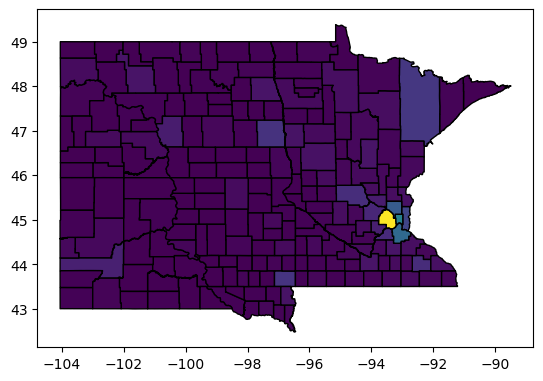

In [6]:
#def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
filename = "countiesWithStatesAndPopulation.shp"
index_col = "FIPS"
map_data = geopandas.read_file(filename = filename).set_index(["State", "NAME"])
map_plot_data = map_data.loc[["North Dakota",
                            "South Dakota",
                            "Minnesota"]]
map_plot_data.plot(column = "Population",
                   cmap = "viridis",
                   alpha = 1,
                   edgecolor = "k")

In [7]:
def import_geo_data(filename, FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename).rename(
        columns = {"State": "state"})
    map_data[FIPS_name] =map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name)
    
    return map_data
map_data = import_geo_data(filename = filename, FIPS_name = index_col)
map_data
    

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry,FIPS
0,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21007
1,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21017
2,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21031
3,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21065
4,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21069
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",31073
3138,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",39075
3139,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",48171
3140,55,079,01581100,0500000US55079,Milwaukee,06,625440563,2455383635,945726.0,Wisconsin,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",55079


<Axes: >

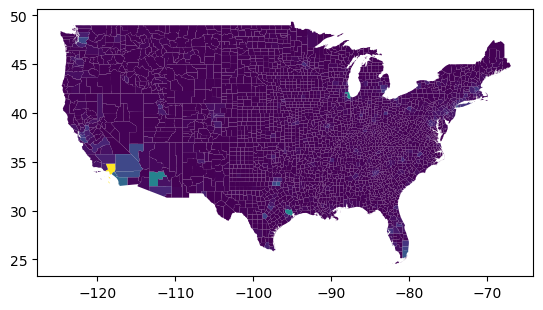

In [8]:
# plot only counties not in Hawaii or Alaska
map_data[~map_data["state"].isin(
    ["Hawaii", "Alaska"])].plot(column = "Population")


In [9]:
u_data = pd.read_csv("countyUnemploymentData.csv",
                    encoding = "latin1",
                    parse_dates = True,
                    index_col = ["date", "fips_code"])
u_data = u_data[list(u_data.keys())[-4:]]
u_data

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_59936/800331859.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv",


Labor Force Employed Unemployed Unemployment Rate
date       fips_code                                                  
2019-08-01 1001           26,079   25,368        711               2.7
           1003           97,939   95,367      2,572               2.6
           1005            8,652    8,322        330               3.8
           1007            8,670    8,403        267               3.1
           1009           25,309   24,641        668               2.6
...                          ...      ...        ...               ...
2021-06-01 72145          12,993   11,580      1,413              10.9
           72147           2,610    2,288        322              12.3
           72149           6,940    6,152        788              11.4
           72151           8,352    7,480        872              10.4
           72153           9,212    8,127      1,085              10.4

[74037 rows x 4 columns]

In [10]:
for key in u_data.keys():
    u_data[key] = pd.to_numeric(u_data[key], errors = "coerce")
u_data.dtypes

Labor Force          float64
Employed             float64
Unemployed           float64
Unemployment Rate    float64
dtype: object

In [11]:
import copy as copy
def create_merged_geo_dataframe(data, map_data):
    data_frame_initialized = False
    matching_gpd = {}
    counties = data.groupby("fips_code").mean().index.unique()
    dates = data.groupby("date").mean().index.unique()
    for key, val in data.items():
        matching_gpd[key] = copy.copy(
            map_data[map_data.index.isin(counties)])
        for date in dates:
            val_slice = val.loc[date]
            val_slice.reset_index().set_index("fips_code")
            matching_gpd[key][date] = val_slice
    return matching_gpd
dates = u_data.groupby("date").mean().index.unique()
u_data = create_merged_geo_dataframe(u_data, map_data)

In [12]:
dates

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='date', freq=None)

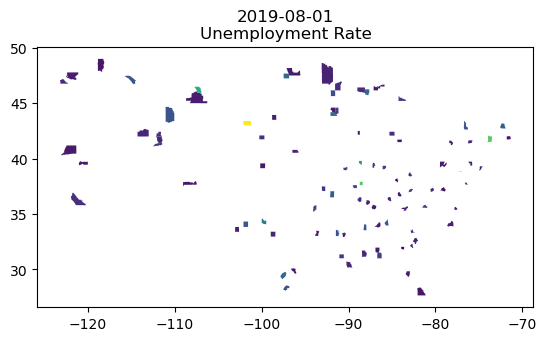

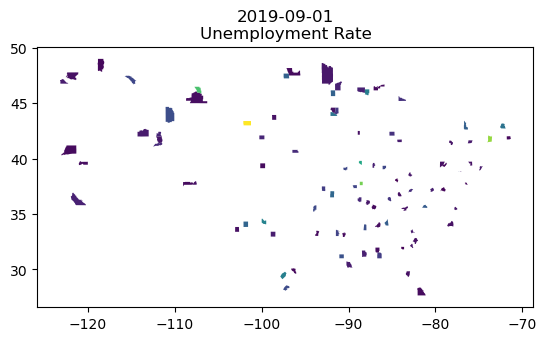

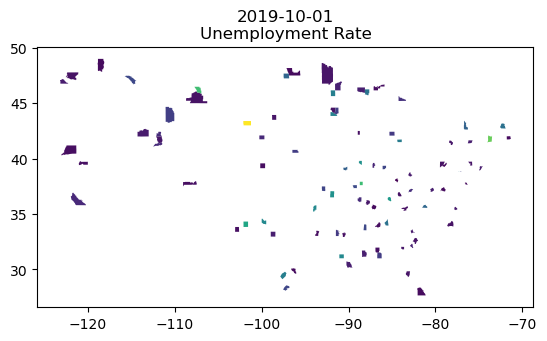

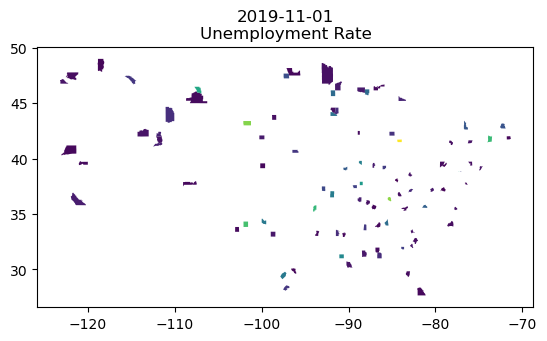

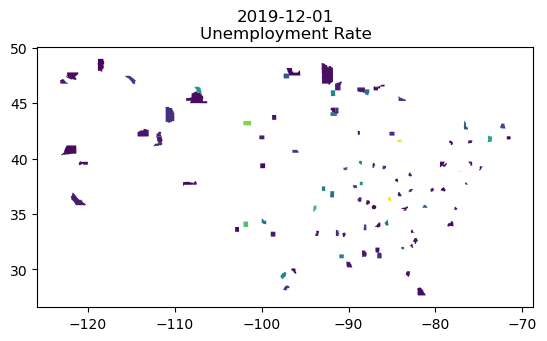

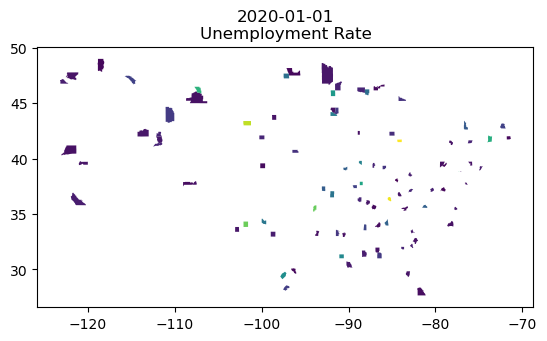

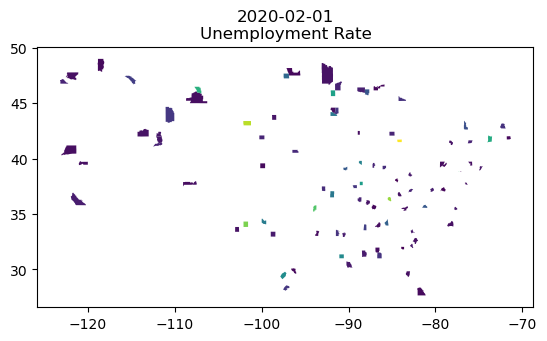

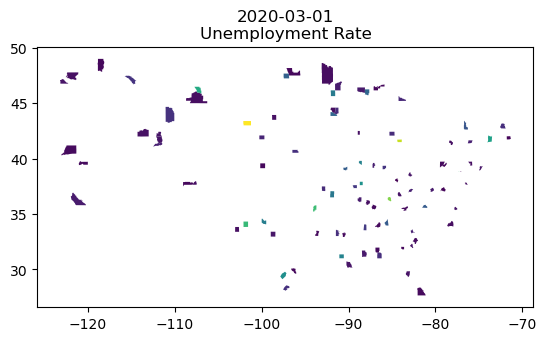

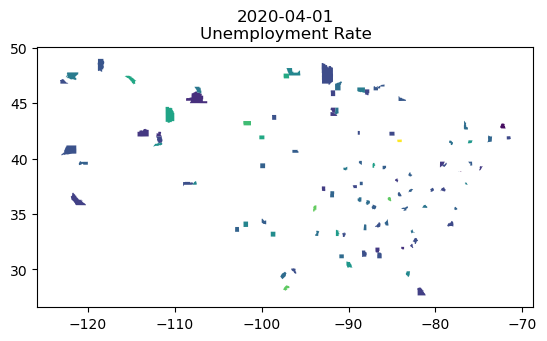

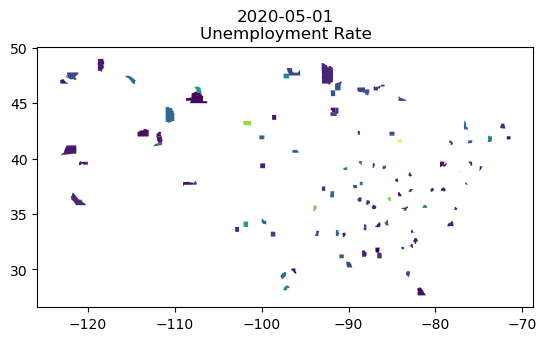

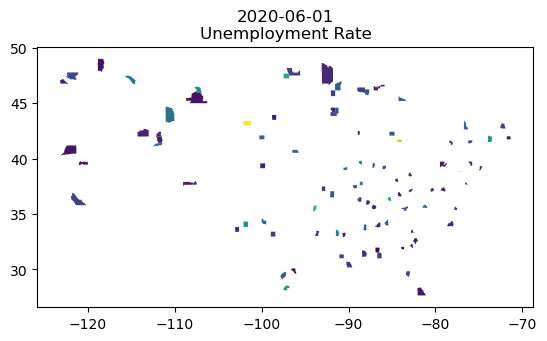

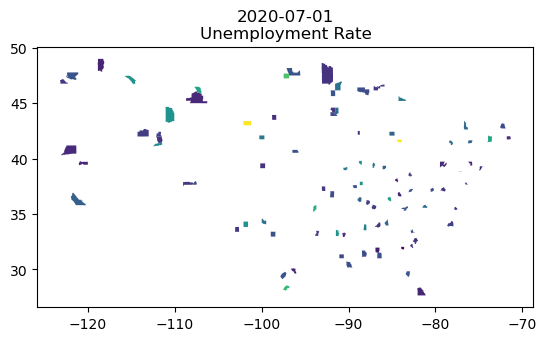

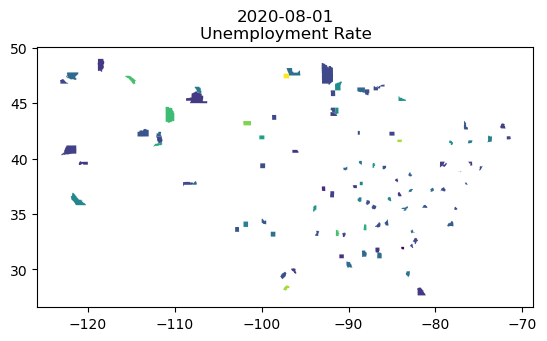

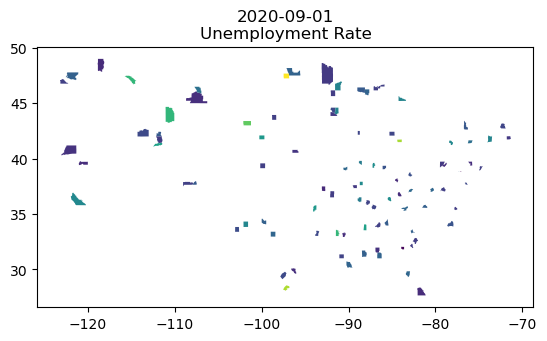

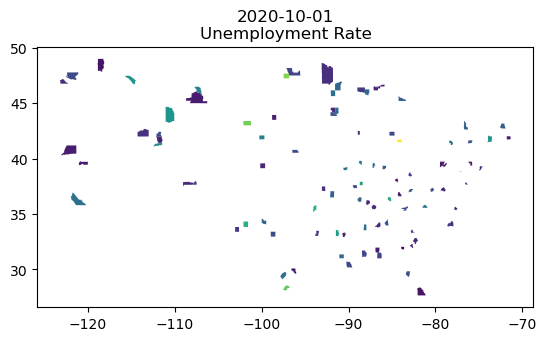

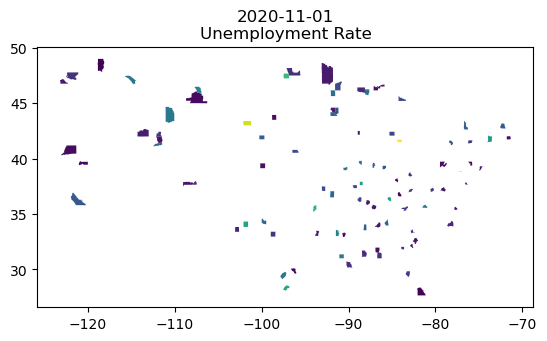

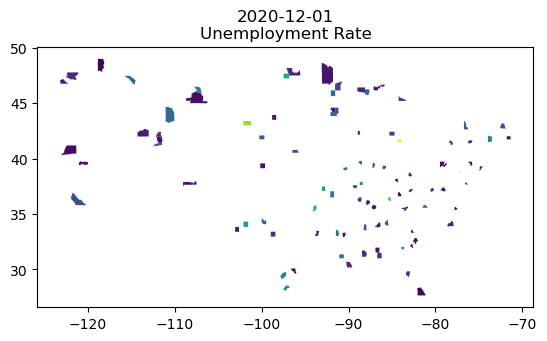

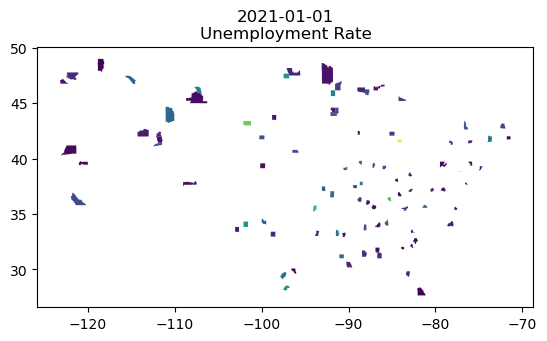

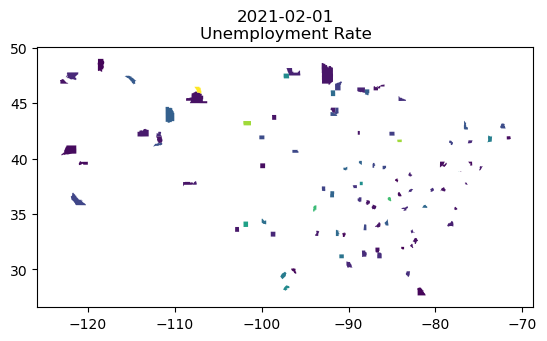

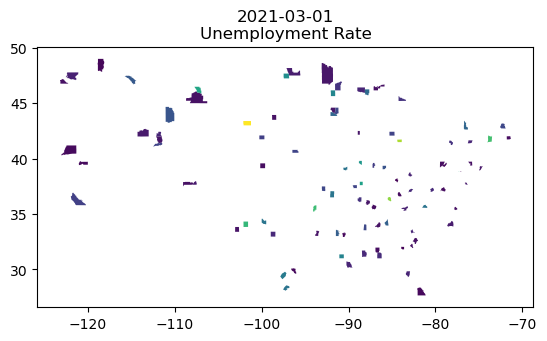

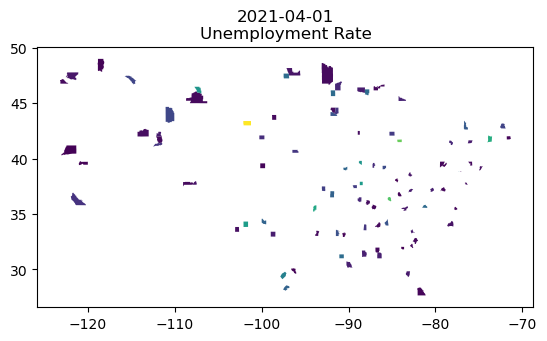

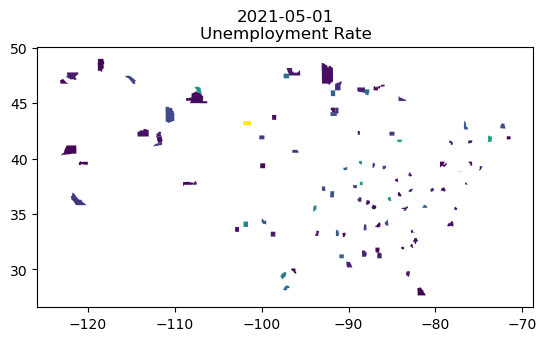

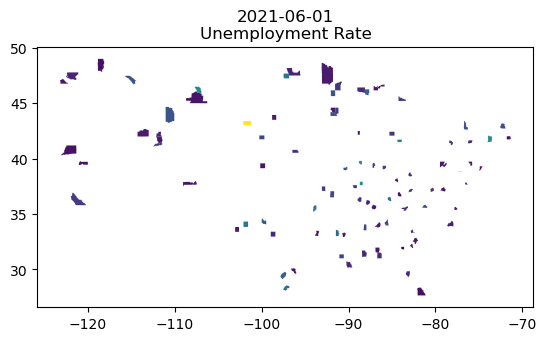

In [16]:
plot_data = u_data["Unemployment Rate"].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
for date in dates:
    plot_data.plot(column=date)
    plt.title(str(date)[:10] + "\nUnemployment Rate")

In [14]:
for key, df in u_data.items():
    u_data[key] = df[~df["state"].isin(["Hawaii", "Alaska"])]

In [15]:
sorted(u_data[key]["state"].unique())

['Alabama',
 'Arkansas',
 'California',
 'Colorado',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']